# Simulation analysis

In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def table_maker(file):
    model_scores = pd.read_csv(file,index_col = 0)
    model_scores_quantiles = model_scores.groupby(["model","obs"]).quantile(q=[0.05,0.95]).reset_index()
    model_scores_mean = model_scores.groupby(["model","obs"]).mean().reset_index()
    model_scores_mean["level_2"] = 0
    
    table = (pd.concat([model_scores_quantiles,model_scores_mean])
   .sort_values(["obs","level_2"]))
    table = table.assign(
        level_2 = np.where(table["level_2"] == 0,"mean",table["level_2"]),
        obs = table["obs"]/3*2
    ).rename({"level_2": "Quartile/Mean"})
    table = table.pivot(index="model", columns=["obs","level_2"], values="score")
    table["index"] = [6,4,5,1,2,3,12,11,10,9,8,7,0]
    table = table.sort_values("index")
    table = table.drop(columns = "index")
    table.columns = table.columns.rename("Cohort Size", level=0)
    table.columns = table.columns.rename("Quantile/Mean", level=1)
    table.index = table.index.rename("Model")
    return(table)

## Simple linear simulation

In [3]:
simple_linear_concordance = table_maker("x simple_linear_simulation.csv")
simple_linear_concordance

Cohort Size                                   250.0                       \
Quantile/Mean                                   mean      0.05      0.95   
Model                                                                      
Unweighted Cox PH                           0.882613  0.840876  0.915608   
Cox PH, Barlow weights                      0.872666  0.831851  0.904693   
Cox PH, Prentice weights                    0.874527  0.834516  0.905848   
Cox PH, Self-Prentice weights               0.873410  0.836375  0.911429   
Cox PH Lasso, Barlow weights                0.872564  0.831851  0.904693   
Cox PH Ridge, Barlow weights                0.873015  0.831851  0.904693   
Cox PH Elastic Net, Barlow weights          0.872853  0.831851  0.904873   
Survival Tree, unweighted                   0.775623  0.709468  0.835016   
Survival Tree, random oversampler           0.767902  0.699969  0.830443   
Survival Tree, SMOTENC                      0.768535  0.697114  0.840725   
Random Survival Forest, unweighted          0.845128  0.794722  0.886615   
Random Survival Forest, random oversampler  0.838394  0.784747  0.887306   
Random Survival Forest, SMOTENC             0.830360  0.778806  0.887466   

Cohort Size                                   500.0                       \
Quantile/Mean                                   mean      0.05      0.95   
Model                                                                      
Unweighted Cox PH                           0.884823  0.855939  0.907597   
Cox PH, Barlow weights                      0.881695  0.850701  0.902508   
Cox PH, Prentice weights                    0.882058  0.850849  0.902772   
Cox PH, Self-Prentice weights               0.882340  0.851145  0.903747   
Cox PH Lasso, Barlow weights                0.881695  0.850701  0.902508   
Cox PH Ridge, Barlow weights                0.881695  0.850701  0.902508   
Cox PH Elastic Net, Barlow weights          0.881695  0.850701  0.902508   
Survival Tree, unweighted                   0.795075  0.751210  0.833831   
Survival Tree, random oversampler           0.781088  0.735020  0.826047   
Survival Tree, SMOTENC                      0.784994  0.731857  0.832949   
Random Survival Forest, unweighted          0.857673  0.823704  0.884302   
Random Survival Forest, random oversampler  0.852657  0.820524  0.879121   
Random Survival Forest, SMOTENC             0.847344  0.806495  0.877486   

Cohort Size                                   1000.0                      
Quantile/Mean                                   mean      0.05      0.95  
Model                                                                     
Unweighted Cox PH                           0.886995  0.868649  0.903339  
Cox PH, Barlow weights                      0.884927  0.865513  0.902102  
Cox PH, Prentice weights                    0.885024  0.865740  0.902123  
Cox PH, Self-Prentice weights               0.885900  0.868029  0.902434  
Cox PH Lasso, Barlow weights                0.884927  0.865513  0.902102  
Cox PH Ridge, Barlow weights                0.884927  0.865513  0.902102  
Cox PH Elastic Net, Barlow weights          0.884927  0.865513  0.902102  
Survival Tree, unweighted                   0.804575  0.776988  0.835237  
Survival Tree, random oversampler           0.792547  0.761633  0.823057  
Survival Tree, SMOTENC                      0.796641  0.768016  0.831650  
Random Survival Forest, unweighted          0.864624  0.843077  0.887374  
Random Survival Forest, random oversampler  0.860041  0.838626  0.881859  
Random Survival Forest, SMOTENC             0.856467  0.832876  0.880598

In [5]:
with open('../Project_file/tables/simple_linear_sim_table.tex', 'w') as tf:
     tf.write(simple_linear_concordance.to_latex(float_format="%.3f", bold_rows = True,multicolumn_format = "c",
                            caption = "Concordance scores over 100 simulations from a Weibull distribution with a linear predictor containing 6 covariates. All Cox models performed similarly, while survival trees and random survival forests performed significantly worse."))

In [25]:
model_scores = pd.read_csv("x simple_linear_simulation.csv",index_col = 0)
model_scores["obs"] = [int(i) for i in model_scores["obs"]*2/3]

sns.set(rc = {'figure.figsize':(10.5,7)})
sns.set_theme(style = "whitegrid")
ax = sns.boxplot(data = model_scores, y = "model", x = "score",hue = "obs",fliersize = 2, whis = (5,95), palette = "magma")
ax.xaxis.grid(True)
ax.set(xlabel = "Concordance Score", ylabel = "Model", title = "Concordance scores over 100 simulations from a Weibull distribution with a linear predictor")
plt.legend(title = "No. Obs.")

plt.savefig("../Project_file/diagrams/simple_linear_simulation_c_plot.pdf", bbox_inches = "tight")

In [150]:
model_scores["obs"]*2/3

0        250.0
1        250.0
2        250.0
3        250.0
4        250.0
         ...  
3882    1000.0
3883    1000.0
3884    1000.0
3885    1000.0
3886    1000.0
Name: obs, Length: 3887, dtype: float64

In [6]:
simple_linear_brier = table_maker("x simple_linear_simulation_brier.csv")
simple_linear_brier

Cohort Size                                   250.0                       \
Quantile/Mean                                   mean      0.05      0.95   
Model                                                                      
Unweighted Cox PH                           0.049228  0.039594  0.062433   
Cox PH, Barlow weights                      0.053317  0.039645  0.073837   
Cox PH, Prentice weights                    0.049318  0.039137  0.064705   
Cox PH, Self-Prentice weights               0.050459  0.038476  0.067171   
Cox PH Lasso, Barlow weights                0.053317  0.039645  0.073837   
Cox PH Ridge, Barlow weights                0.053551  0.039645  0.073885   
Cox PH Elastic Net, Barlow weights          0.053367  0.039645  0.073837   
Survival Tree, unweighted                   0.101739  0.074774  0.128501   
Survival Tree, random oversampler           0.103110  0.074605  0.140989   
Survival Tree, SMOTENC                      0.096272  0.072018  0.125547   
Random Survival Forest, unweighted          0.069212  0.056094  0.083379   
Random Survival Forest, random oversampler  0.062886  0.048919  0.077930   
Random Survival Forest, SMOTENC             0.063668  0.050417  0.079474   

Cohort Size                                   500.0                       \
Quantile/Mean                                   mean      0.05      0.95   
Model                                                                      
Unweighted Cox PH                           0.044206  0.035772  0.053058   
Cox PH, Barlow weights                      0.047311  0.036798  0.058813   
Cox PH, Prentice weights                    0.043095  0.034577  0.052679   
Cox PH, Self-Prentice weights               0.043504  0.034919  0.053226   
Cox PH Lasso, Barlow weights                0.047311  0.036798  0.058813   
Cox PH Ridge, Barlow weights                0.047311  0.036798  0.058813   
Cox PH Elastic Net, Barlow weights          0.047311  0.036798  0.058813   
Survival Tree, unweighted                   0.089052  0.072932  0.110275   
Survival Tree, random oversampler           0.093347  0.074978  0.113132   
Survival Tree, SMOTENC                      0.085278  0.069446  0.101508   
Random Survival Forest, unweighted          0.061158  0.052795  0.072313   
Random Survival Forest, random oversampler  0.056138  0.046174  0.067606   
Random Survival Forest, SMOTENC             0.056680  0.047774  0.067349   

Cohort Size                                   1000.0                      
Quantile/Mean                                   mean      0.05      0.95  
Model                                                                     
Unweighted Cox PH                           0.040379  0.035668  0.045974  
Cox PH, Barlow weights                      0.042948  0.036087  0.051309  
Cox PH, Prentice weights                    0.038771  0.032724  0.044635  
Cox PH, Self-Prentice weights               0.038680  0.033257  0.045610  
Cox PH Lasso, Barlow weights                0.042948  0.036087  0.051309  
Cox PH Ridge, Barlow weights                0.042948  0.036087  0.051309  
Cox PH Elastic Net, Barlow weights          0.042948  0.036087  0.051309  
Survival Tree, unweighted                   0.082723  0.070962  0.096465  
Survival Tree, random oversampler           0.084102  0.071300  0.100117  
Survival Tree, SMOTENC                      0.077186  0.066352  0.089716  
Random Survival Forest, unweighted          0.055508  0.048658  0.064418  
Random Survival Forest, random oversampler  0.051113  0.044033  0.059202  
Random Survival Forest, SMOTENC             0.050968  0.044074  0.058371

Finding the difference in performance compared to the baseline for each run:

In [7]:
with open('../Project_file/tables/simple_linear_brier_sim_table.tex', 'w') as tf:
     tf.write(simple_linear_brier.to_latex(float_format="%.3f", bold_rows = True,multicolumn_format = "c",
                            caption = "Integrated Brier scores over 100 simulations from a Weibull distribution with a linear predictor containing 6 covariates. All Cox models performed similarly, while survival trees and random survival forests performed significantly worse."))

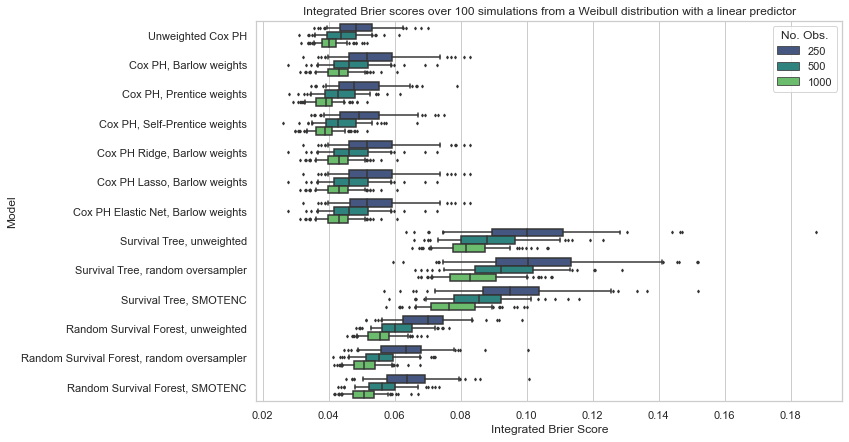

In [28]:
model_scores = pd.read_csv("x simple_linear_simulation_brier.csv",index_col = 0)
model_scores["obs"] = [int(i) for i in model_scores["obs"]*2/3]

sns.set(rc = {'figure.figsize':(10.5,7)})
sns.set_theme(style = "whitegrid")
ax = sns.boxplot(data = model_scores, y = "model", x = "score",hue = "obs",fliersize = 2, whis = (5,95), palette = "viridis")
ax.xaxis.grid(True)
ax.set(xlabel = "Integrated Brier Score", ylabel = "Model", title = "Integrated Brier scores over 100 simulations from a Weibull distribution with a linear predictor")
plt.legend(title = "No. Obs.")

plt.savefig("../Project_file/diagrams/simple_linear_simulation_brier_plot.pdf", bbox_inches = "tight")

## Exponential REDO

In [8]:
exponential_concordance = table_maker("x exponential_sim.csv")
exponential_concordance

Cohort Size                                    500.0                    
Quantile/Mean                                   mean      0.05      0.95
Model                                                                   
Unweighted Cox PH                           0.931041  0.887645  0.967134
Cox PH, Barlow weights                      0.931041  0.887645  0.967134
Cox PH, Prentice weights                    0.931041  0.887645  0.967134
Cox PH, Self-Prentice weights               0.931041  0.887645  0.967134
Cox PH Lasso, Barlow weights                0.931041  0.887645  0.967134
Cox PH Ridge, Barlow weights                0.931041  0.887645  0.967134
Cox PH Elastic Net, Barlow weights          0.931041  0.887645  0.967134
Survival Tree, unweighted                   0.894599  0.842052  0.943662
Survival Tree, random oversampler           0.888519  0.831978  0.931214
Survival Tree, SMOTENC                      0.883674  0.828805  0.932441
Random Survival Forest, unweighted          0.912316  0.865391  0.957773
Random Survival Forest, random oversampler  0.904403  0.849558  0.951742
Random Survival Forest, SMOTENC             0.905494  0.856002  0.954053

In [187]:
with open('../Project_file/tables/exponential_sim_table.tex', 'w') as tf:
     tf.write(exponential_concordance.to_latex(float_format="%.3f", bold_rows = True,multicolumn_format = "c",
                             caption = "Concordance scores over 100 simulations from a Weibull distribution with a predictor of the form $\exp(2 x_i)$. Cox models had a slightly higher performance on average than surival trees or random survival forests."))

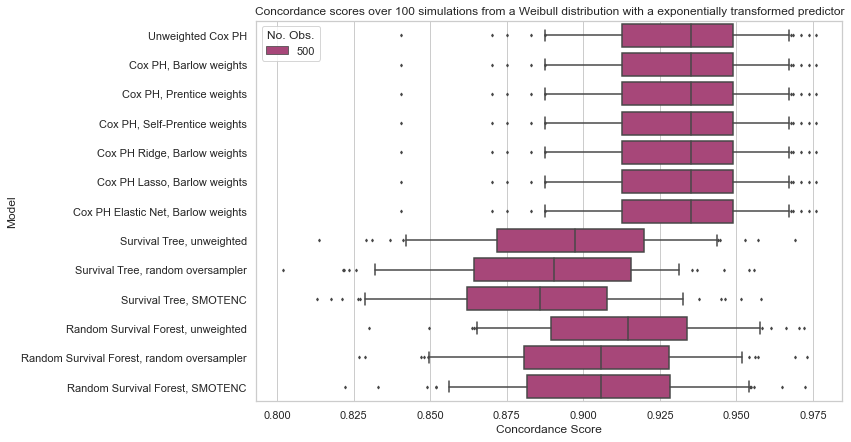

In [31]:
model_scores = pd.read_csv("x exponential_sim.csv",index_col = 0)
model_scores["obs"] = [int(i) for i in model_scores["obs"]*2/3]

sns.set(rc = {'figure.figsize':(10.5,7)})
sns.set_theme(style = "whitegrid")
ax = sns.boxplot(data = model_scores, y = "model", x = "score",hue = "obs",fliersize = 2, whis = (5,95), palette = "magma")
ax.xaxis.grid(True)
ax.set(ylabel = "Model", xlabel = "Concordance Score", title = "Concordance scores over 100 simulations from a Weibull distribution with an exponentially transformed predictor")
plt.legend(title = "No. Obs.")

plt.savefig("../Project_file/diagrams/exponential_sim_simulation_c_plot.pdf", bbox_inches = "tight")

In [21]:
exponential_brier = table_maker("exponential_simulation_brier.csv")
exponential_brier

Cohort Size                                    500.0                    
Quantile/Mean                                   mean      0.05      0.95
Model                                                                   
Unweighted Cox PH                           0.081710  0.034586  0.160027
Cox PH, Barlow weights                      0.072634  0.036321  0.115364
Cox PH, Prentice weights                    0.074821  0.031041  0.133996
Cox PH, Self-Prentice weights               0.066055  0.030862  0.104925
Cox PH Lasso, Barlow weights                0.072634  0.036321  0.115364
Cox PH Ridge, Barlow weights                0.072634  0.036321  0.115364
Cox PH Elastic Net, Barlow weights          0.072634  0.036321  0.115364
Survival Tree, unweighted                   0.044111  0.018032  0.084835
Survival Tree, random oversampler           0.039895  0.017366  0.073359
Survival Tree, SMOTE                        0.047509  0.018979  0.092214
Random Survival Forest, unweighted          0.035202  0.014681  0.065628
Random Survival Forest, random oversampler  0.032541  0.013255  0.058268
Random Survival Forest, SMOTE               0.036664  0.015103  0.068375

In [22]:
with open('../Project_file/tables/exponential_brier.tex', 'w') as tf:
     tf.write(exponential_brier.to_latex(float_format="%.3f", bold_rows = True,multicolumn_format = "c",
                             caption = "Integrated Brier scores over 100 simulations from a Weibull distribution with a predictor of the form $\exp(2 x_i)$. Cox models had a slightly higher performance on average than surival trees or random survival forests."))

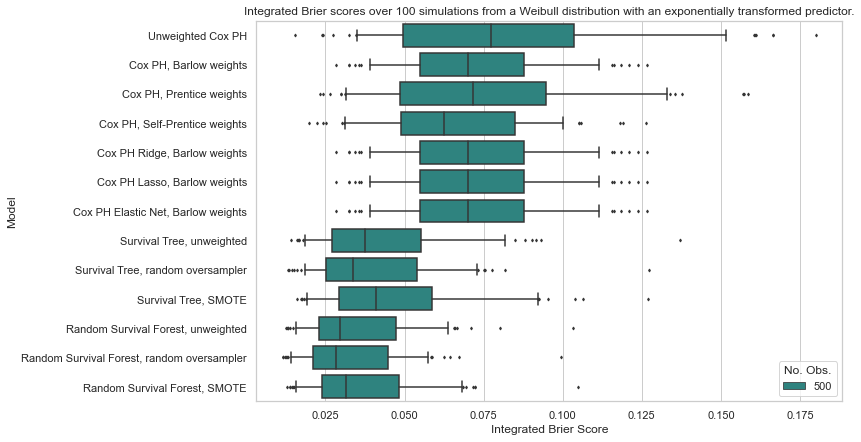

In [33]:
model_scores = pd.read_csv("exponential_simulation_brier.csv",index_col = 0)
model_scores["obs"] = [int(i) for i in model_scores["obs"]*2/3]

sns.set(rc = {'figure.figsize':(10.5,7)})
sns.set_theme(style = "whitegrid")
ax = sns.boxplot(data = model_scores, y = "model", x = "score",hue = "obs",fliersize = 2, whis = (5,95), palette = "viridis")
ax.xaxis.grid(True)
ax.set(xlabel = "Integrated Brier Score", ylabel = "Model", title = "Integrated Brier scores over 100 simulations from a Weibull distribution with an exponentially transformed predictor.")
plt.legend(title = "No. Obs.")

plt.savefig("../Project_file/diagrams/exponential_sim_simulation_brier_plot.pdf", bbox_inches = "tight")

## Interaction

In [13]:
interaction_concordance = table_maker("x interaction_sim.csv")
interaction_concordance

Cohort Size                                    500.0                    
Quantile/Mean                                   mean      0.05      0.95
Model                                                                   
Unweighted Cox PH                           0.679395  0.611345  0.751464
Cox PH, Barlow weights                      0.679615  0.611972  0.751786
Cox PH, Prentice weights                    0.679616  0.611968  0.751792
Cox PH, Self-Prentice weights               0.676624  0.606486  0.753238
Cox PH Lasso, Barlow weights                0.679580  0.611045  0.751786
Cox PH Ridge, Barlow weights                0.679493  0.611972  0.751786
Cox PH Elastic Net, Barlow weights          0.679283  0.611972  0.751786
Survival Tree, unweighted                   0.832272  0.791731  0.874411
Survival Tree, random oversampler           0.820288  0.778060  0.861663
Survival Tree, SMOTENC                      0.823070  0.784212  0.867218
Random Survival Forest, unweighted          0.840710  0.785412  0.889337
Random Survival Forest, random oversampler  0.845892  0.796732  0.891301
Random Survival Forest, SMOTENC             0.842617  0.795543  0.890440

In [14]:
with open('../Project_file/tables/interaction_sim_table.tex', 'w') as tf:
     tf.write(interaction_concordance.to_latex(float_format="%.3f", bold_rows = True,multicolumn_format = "c",
             caption = "Concordance scores over 100 Weibull simulations with two linear predictors and an interaction variable. Survival trees and random survival forests performed significantly better than Cox methods."))

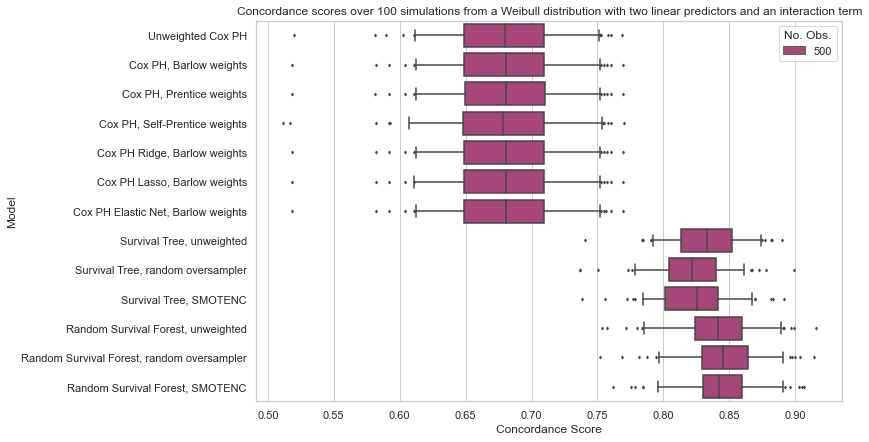

In [34]:
model_scores = pd.read_csv("x interaction_sim.csv",index_col = 0)
model_scores["obs"] = [int(i) for i in model_scores["obs"]*2/3]

sns.set(rc = {'figure.figsize':(10.5,7)})
sns.set_theme(style = "whitegrid")
ax = sns.boxplot(data = model_scores, y = "model", x = "score",hue = "obs",fliersize = 2, whis = (5,95), palette = "magma")
ax.xaxis.grid(True)
ax.set(xlabel = "Concordance Score", ylabel = "Model", title = "Concordance scores over 100 simulations from a Weibull distribution with two linear predictors and an interaction term")
plt.legend(title = "No. Obs.")

plt.savefig("../Project_file/diagrams/interaction_sim_c_plot.pdf", bbox_inches = "tight")

In [15]:
interaction_brier = table_maker("x interaction_simulation_brier.csv")
interaction_brier

Cohort Size                                    500.0                    
Quantile/Mean                                   mean      0.05      0.95
Model                                                                   
Unweighted Cox PH                           0.101871  0.087242  0.116638
Cox PH, Barlow weights                      0.084401  0.065469  0.109201
Cox PH, Prentice weights                    0.090266  0.076094  0.106787
Cox PH, Self-Prentice weights               0.080365  0.063117  0.105584
Cox PH Lasso, Barlow weights                0.084686  0.065469  0.109201
Cox PH Ridge, Barlow weights                0.086239  0.067070  0.109201
Cox PH Elastic Net, Barlow weights          0.085203  0.065469  0.111660
Survival Tree, unweighted                   0.066188  0.053101  0.083156
Survival Tree, random oversampler           0.066999  0.051123  0.083548
Survival Tree, SMOTENC                      0.069436  0.055086  0.087276
Random Survival Forest, unweighted          0.051681  0.043953  0.062603
Random Survival Forest, random oversampler  0.045291  0.036336  0.057085
Random Survival Forest, SMOTENC             0.049379  0.041222  0.059561

Finding the difference in performance compared to the baseline for each run:

In [16]:
with open('../Project_file/tables/interaction_brier_sim_table.tex', 'w') as tf:
     tf.write(interaction_brier.to_latex(float_format="%.3f", bold_rows = True,multicolumn_format = "c",
                            caption = "Integrated Brier scores over 100 Weibull simulations with two linear predictors and an interaction variable. All Cox models performed similarly, significantly worse than survival trees and random forests."))

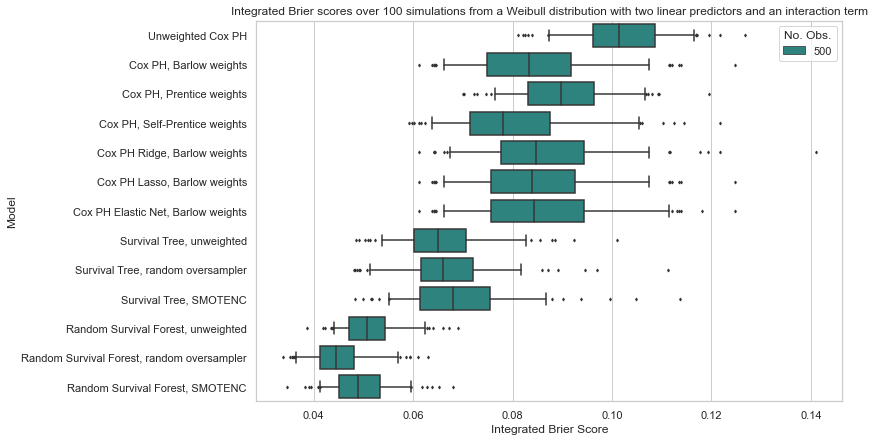

In [36]:
model_scores = pd.read_csv("x interaction_simulation_brier.csv",index_col = 0)
model_scores["obs"] = [int(i) for i in model_scores["obs"]*2/3]

sns.set(rc = {'figure.figsize':(10.5,7)})
sns.set_theme(style = "whitegrid")
ax = sns.boxplot(data = model_scores, y = "model", x = "score",hue = "obs",fliersize = 2, whis = (5,95), palette = "viridis")
ax.xaxis.grid(True)
ax.set(ylabel = "Model", xlabel = "Integrated Brier Score", title = "Integrated Brier scores over 100 simulations from a Weibull distribution with two linear predictors and an interaction term")
plt.legend(title = "No. Obs.")

plt.savefig("../Project_file/diagrams/interaction_sim_brier_plot.pdf", bbox_inches = "tight")

# Accelerated failure time 

In [144]:
AFT_concordance = table_maker("x accelerated_time_sim.csv")
AFT_concordance

Cohort Size                                   500.0                       \
Quantile/Mean                                   mean      0.05      0.95   
Model                                                                      
Unweighted Cox PH                           0.959318  0.944671  0.971806   
Cox PH, Barlow weights                      0.957483  0.943174  0.971208   
Cox PH, Prentice weights                    0.957888  0.943011  0.971461   
Cox PH, Self-Prentice weights               0.957671  0.944937  0.970939   
Cox PH Lasso, Barlow weights                0.957483  0.943174  0.971208   
Cox PH Ridge, Barlow weights                0.957483  0.943174  0.971208   
Cox PH Elastic Net, Barlow weights          0.957483  0.943174  0.971208   
Survival Tree, unweighted                   0.892794  0.856601  0.926463   
Survival Tree, random oversampler           0.877648  0.831960  0.914571   
Survival Tree, SMOTENC                      0.862759  0.800872  0.912975   
Random Survival Forest, unweighted          0.929307  0.906022  0.953060   
Random Survival Forest, random oversampler  0.923653  0.898799  0.948543   
Random Survival Forest, SMOTENC             0.912612  0.873547  0.947386   

Cohort Size                                   1000.0                      
Quantile/Mean                                   mean      0.05      0.95  
Model                                                                     
Unweighted Cox PH                           0.959382  0.950667  0.967360  
Cox PH, Barlow weights                      0.958417  0.949902  0.966123  
Cox PH, Prentice weights                    0.958607  0.949979  0.966390  
Cox PH, Self-Prentice weights               0.958576  0.951046  0.966302  
Cox PH Lasso, Barlow weights                0.958417  0.949902  0.966123  
Cox PH Ridge, Barlow weights                0.958417  0.949902  0.966123  
Cox PH Elastic Net, Barlow weights          0.958417  0.949902  0.966123  
Survival Tree, unweighted                   0.906901  0.889534  0.924222  
Survival Tree, random oversampler           0.893386  0.867335  0.919161  
Survival Tree, SMOTENC                      0.874875  0.829417  0.911724  
Random Survival Forest, unweighted          0.937744  0.919634  0.952389  
Random Survival Forest, random oversampler  0.934041  0.914932  0.950253  
Random Survival Forest, SMOTENC             0.925654  0.902630  0.947588

In [157]:
with open('../Project_file/tables/accelerated_sim_table.tex', 'w') as tf:
     tf.write(AFT_concordance.to_latex(float_format="%.3f", bold_rows = True,multicolumn_format = "c",
                             caption = "Concordance scores for 100 simulations from an accelerated failure time model with a log-normal error distribution and a linear predictor with 10 covariates. All Cox models performed similarly and not significantly differently from the baseline. Both survival trees and random survival forests performed significantly worse than the baseline."))

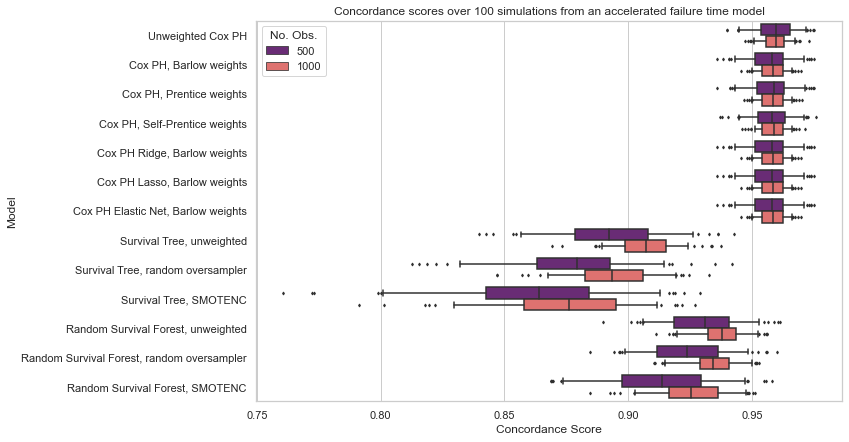

In [38]:
model_scores = pd.read_csv("x accelerated_time_sim.csv")
model_scores["obs"] = [int(i) for i in model_scores["obs"]*2/3]

sns.set(rc = {'figure.figsize':(10.5,7)})
sns.set_theme(style = "whitegrid")
ax = sns.boxplot(data = model_scores, y = "model", x = "score",hue = "obs",fliersize = 2, whis = (5,95), palette = "magma")
ax.xaxis.grid(True)
ax.set(xlabel = "Concordance Score",ylabel = "Model", title = "Concordance scores over 100 simulations from an accelerated failure time model")
plt.legend(title = "No. Obs.")

plt.savefig("../Project_file/diagrams/accelerated_time_c_plot.pdf", bbox_inches = "tight")

In [4]:
AFT_brier = table_maker("x accelerated_time_simulation_brier.csv")
AFT_brier

Cohort Size                                   500.0                       \
Quantile/Mean                                   mean      0.05      0.95   
Model                                                                      
Unweighted Cox PH                           0.044827  0.032239  0.058092   
Cox PH, Barlow weights                      0.053988  0.037361  0.074403   
Cox PH, Prentice weights                    0.045074  0.033310  0.059676   
Cox PH, Self-Prentice weights               0.046003  0.033600  0.060682   
Cox PH Lasso, Barlow weights                0.053988  0.037361  0.074403   
Cox PH Ridge, Barlow weights                0.054062  0.037361  0.074403   
Cox PH Elastic Net, Barlow weights          0.053988  0.037361  0.074403   
Survival Tree, unweighted                   0.109981  0.080448  0.142895   
Survival Tree, random oversampler           0.118752  0.082864  0.156267   
Survival Tree, SMOTENC                      0.119553  0.082180  0.173219   
Random Survival Forest, unweighted          0.095101  0.077123  0.113442   
Random Survival Forest, random oversampler  0.076286  0.061701  0.092205   
Random Survival Forest, SMOTENC             0.082466  0.065199  0.101926   

Cohort Size                                   1000.0                      
Quantile/Mean                                   mean      0.05      0.95  
Model                                                                     
Unweighted Cox PH                           0.041792  0.036650  0.050146  
Cox PH, Barlow weights                      0.050435  0.039832  0.065198  
Cox PH, Prentice weights                    0.040636  0.033292  0.050091  
Cox PH, Self-Prentice weights               0.041069  0.034506  0.050401  
Cox PH Lasso, Barlow weights                0.050435  0.039832  0.065198  
Cox PH Ridge, Barlow weights                0.050435  0.039832  0.065198  
Cox PH Elastic Net, Barlow weights          0.050435  0.039832  0.065198  
Survival Tree, unweighted                   0.098198  0.078524  0.113787  
Survival Tree, random oversampler           0.105086  0.089640  0.122862  
Survival Tree, SMOTENC                      0.100386  0.075987  0.120072  
Random Survival Forest, unweighted          0.079341  0.069127  0.102325  
Random Survival Forest, random oversampler  0.064240  0.056593  0.077818  
Random Survival Forest, SMOTENC             0.068661  0.055189  0.086503

In [18]:
with open('../Project_file/tables/acceleration_time_brier_sim_table.tex', 'w') as tf:
     tf.write(AFT_brier.to_latex(float_format="%.3f", bold_rows = True,multicolumn_format = "c",
                            caption = "Integrated Brier scores over 100 accelerated failure time simulations. Cox models performed similarly and better than survival trees and random survival forests."))

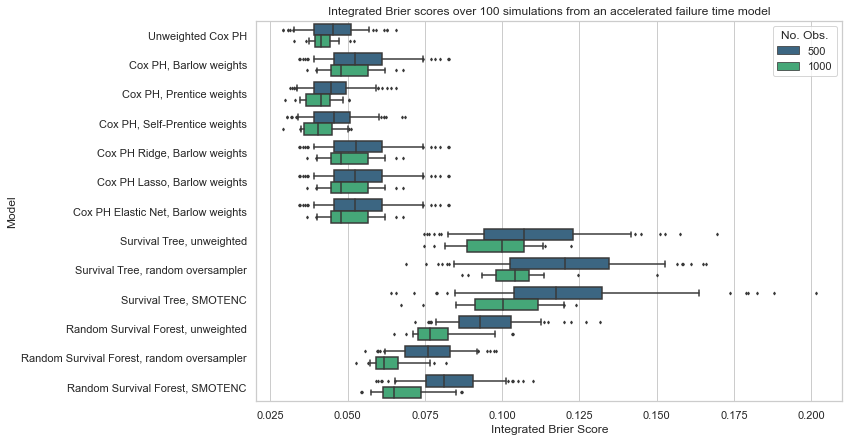

In [42]:
model_scores = pd.read_csv("x accelerated_time_simulation_brier.csv",index_col = 0)
model_scores["obs"] = [int(i) for i in model_scores["obs"]*2/3]

sns.set(rc = {'figure.figsize':(10.5,7)})
sns.set_theme(style = "whitegrid")
ax = sns.boxplot(data = model_scores, y = "model", x = "score",hue = "obs",fliersize = 2, whis = (5,95), palette = "viridis")
ax.xaxis.grid(True)
ax.set(xlabel = "Integrated Brier Score",ylabel = "Model", title = "Integrated Brier scores over 100 simulations from an accelerated failure time model")
plt.legend(title = "No. Obs.")

plt.savefig("../Project_file/diagrams/accelerated_time_brier_plot.pdf", bbox_inches = "tight")

## High dimensionality

In [19]:
high_dimension_concordance = table_maker("x high_dimension.csv")
high_dimension_concordance

Cohort Size                                    500.0                    
Quantile/Mean                                   mean      0.05      0.95
Model                                                                   
Unweighted Cox PH                           0.618924  0.566194  0.672089
Cox PH, Barlow weights                      0.599736  0.537572  0.666147
Cox PH, Prentice weights                    0.603329  0.541832  0.667120
Cox PH, Self-Prentice weights               0.584607  0.514887  0.652012
Cox PH Lasso, Barlow weights                0.667494  0.621211  0.722891
Cox PH Ridge, Barlow weights                0.614102  0.557766  0.673962
Cox PH Elastic Net, Barlow weights          0.652793  0.605806  0.706531
Survival Tree, unweighted                   0.560096  0.501094  0.615300
Survival Tree, random oversampler           0.563250  0.516418  0.620235
Survival Tree, SMOTENC                      0.558561  0.495294  0.617776
Random Survival Forest, unweighted          0.639656  0.580211  0.691088
Random Survival Forest, random oversampler  0.641062  0.586727  0.693563
Random Survival Forest, SMOTENC             0.632079  0.561461  0.695980

In [20]:
with open('../Project_file/tables/high_dimension_table.tex', 'w') as tf:
     tf.write(high_dimension_concordance.to_latex(float_format="%.3f", bold_rows = True,multicolumn_format = "c",
                                                  caption = "Concordance scores over 100 Weibull simulations with a large number of covariates. Ridge and Elastic Net Cox models provide the highest average concordance scores, followed by random oversampled random survival forests."))

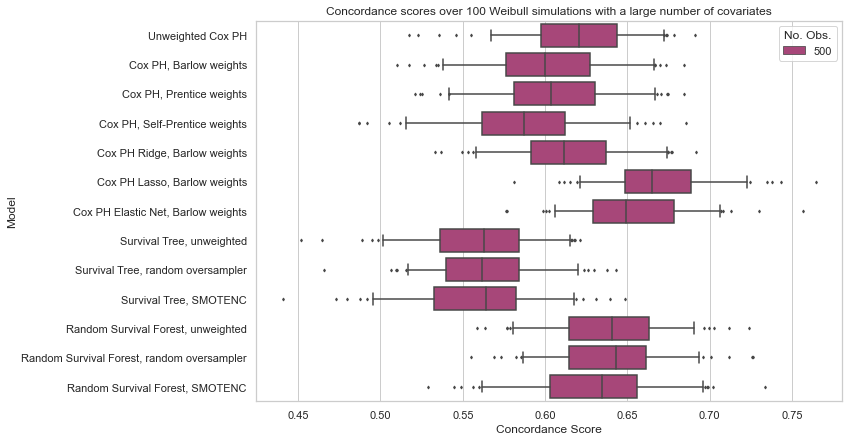

In [44]:
model_scores = pd.read_csv("x high_dimension.csv",index_col = 0)
model_scores["obs"] = [int(i) for i in model_scores["obs"]*2/3]

sns.set(rc = {'figure.figsize':(10.5,7)})
sns.set_theme(style = "whitegrid")
ax = sns.boxplot(data = model_scores, y = "model", x = "score",hue = "obs",fliersize = 2, whis = (5,95), palette = "magma")
ax.xaxis.grid(True)
ax.set(xlabel = "Concordance Score",ylabel = "Model", title = "Concordance scores over 100 Weibull simulations with a large number of covariates")
plt.legend(title = "No. Obs.")

plt.savefig("../Project_file/diagrams/high_dimension_c_plot.pdf", bbox_inches = "tight")

In [24]:
high_dimension_brier = table_maker("x high_dimension_brier.csv")
high_dimension_brier

Cohort Size                                    500.0                    
Quantile/Mean                                   mean      0.05      0.95
Model                                                                   
Unweighted Cox PH                           0.074607  0.056149  0.097505
Cox PH, Barlow weights                      0.074433  0.051846  0.099701
Cox PH, Prentice weights                    0.076940  0.055238  0.099365
Cox PH, Self-Prentice weights               0.095226  0.062036  0.139816
Cox PH Lasso, Barlow weights                0.058748  0.042780  0.084621
Cox PH Ridge, Barlow weights                0.061394  0.044315  0.086885
Cox PH Elastic Net, Barlow weights          0.058379  0.042824  0.083305
Survival Tree, unweighted                   0.143952  0.117466  0.177225
Survival Tree, random oversampler           0.145634  0.116507  0.179280
Survival Tree, SMOTENC                      0.141470  0.113957  0.172191
Random Survival Forest, unweighted          0.081185  0.065909  0.097164
Random Survival Forest, random oversampler  0.069939  0.055886  0.087668
Random Survival Forest, SMOTENC             0.071876  0.056781  0.088588

In [25]:
with open('../Project_file/tables/high_dimension_brier_table.tex', 'w') as tf:
     tf.write(high_dimension_brier.to_latex(float_format="%.3f", bold_rows = True,multicolumn_format = "c",
                                                  caption = "Integrated Brier scores over 100 Weibull simulations with a large number of covariates. Penalised Cox had the lowest Brier scores, followed by random oversampled random survival forests."))

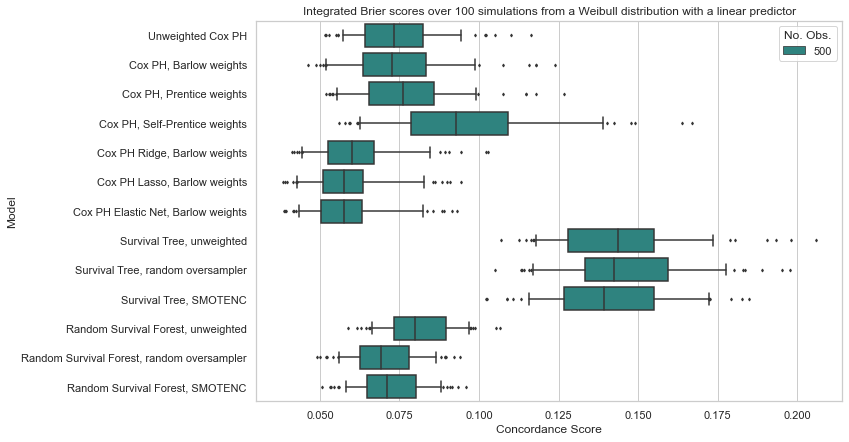

In [45]:
model_scores = pd.read_csv("x high_dimension_brier.csv",index_col = 0)
model_scores["obs"] = [int(i) for i in model_scores["obs"]*2/3]

sns.set(rc = {'figure.figsize':(10.5,7)})
sns.set_theme(style = "whitegrid")
ax = sns.boxplot(data = model_scores, y = "model", x = "score",hue = "obs",fliersize = 2, whis = (5,95), palette = "viridis")
ax.xaxis.grid(True)
ax.set(xlabel = "Concordance Score",ylabel = "Model", title = "Integrated Brier scores over 100 simulations from a Weibull distribution with a linear predictor")
plt.legend(title = "No. Obs.")

plt.savefig("../Project_file/diagrams/high_dimension_brier_plot.pdf", bbox_inches = "tight")